![Logo UNAL CHEC](https://github.com/UN-GCPDS/curso_IA_CHEC/blob/main/logo_unal_chec.jpg?raw=1)

# **MÓDULO 4: FUNDAMENTOS DE VISIÓN POR COMPUTADOR**

## Descripción:
Estudio de los principios básicos de captura de imágenes y video, manejo de cámaras (RGB y por termografía) y redes neuronales convolucionales.

### **Profesor - Sesión 7:** Juan Bernardo Gómez Mendoza
### **Monitores - Sesión 7:** Juan Camilo Lugo Rojas y Lucas Miguel Iturriago Salas

#### Configuración del entorno

In [1]:
%%capture
# Instalar y actualizar bibliotecas necesarias
!pip install gdown
!pip install roboflow
!pip install ultralytics

# Importar bibliotecas a usar y deshabilitar WanDB

import os
import yaml
import gdown
import wandb
import shutil
import requests
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image, display, clear_output

os.environ['WANDB_DISABLED'] = 'true'
import wandb


# Descargar repositorio de aisladores

rf = Roboflow(api_key="EKato538chIPhManlH2u")
project = rf.workspace("universidad-nacional-6lud5").project("aisladores-kgqgu")
version = project.version(3)
dataset = version.download("yolov9")

# Creación del directorio de las partes de la base de datos

data = {
    'path': '/kaggle/working/Aisladores--3',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'names': { 0: 'AR', 1: 'AS'},
    'roboflow': {
        'license': 'Public Domain',
        'project': 'aisladores-kgqgu',
        'url': 'https://universe.roboflow.com/universidad-nacional-6lud5/aisladores-kgqgu/dataset/3',
        'version': 3,
        'workspace': 'universidad-nacional-6lud5'}
}

# Especificar el directorio del archivo
file_path = '/kaggle/working/Aisladores--3/data.yaml'

# Escribir la información sobre el archivo YAML
with open(file_path, 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

### **Objetivo**

Utilizar una base de datos de aisladores previamente etiquetada para entrenar y evaluar el rendimiento de una red convolucional en la detección de objetos, optimizando su capacidad para identificar y clasificar aisladores.

### **YOLOv10**

![Arquitectura YOLO](https://learnopencv.com/wp-content/uploads/2024/06/image21.png)

YOLOv10 es una red convolucional de detección de objetos que identifica y localiza objetos en imágenes y videos. Utiliza algoritmos de aprendizaje profundo para reconocer patrones y clasificar objetos en categorías específicas. Es capaz de detectar múltiples objetos simultáneamente con alta precisión y velocidad.

### **Datos**

![Aisladores](https://github.com/UN-GCPDS/curso_IA_CHEC/raw/main/Modulo4/sources/aisladores.png)


La base de datos (previamente etiquetada en Roboflow) a usar contiene imágenes de aisladores, donde se han aplicado técnicas de cajas delimitadoras para etiquetar las imágenes y de aumento de datos. Esta base de datos clasifica los aisladores en dos tipos: aisladores de suspensión y aisladores de retención, lo que permitirá entrenar y evaluar un modelo de detección de objetos especializado en identificar estas categorías específicas en diversas condiciones.

### Entrenamiento del modelo

In [2]:
# Entrenar YOLOv10 para detección de aisladores

# Carga de modelo preentrenado
model = YOLO('yolov10m.pt') 

# Entrenar el modelo
results = model.train(data='/kaggle/working/Aisladores--3/data.yaml', epochs=100, imgsz=640, device=[0,1])

100%|██████████| 32.1M/32.1M [00:00<00:00, 175MB/s] 
100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]
2024-10-30 22:55:47,972	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-30 22:55:49,208	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Ultralytics 8.3.25 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=2
Transferred 787/799 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 60.5MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Aisladores--3/train/labels... 210 images, 0 backgrounds, 0 corrupt: 100%|██████████| 210/210 [00:00<00:00, 804.41it/s]


train: New cache created: /kaggle/working/Aisladores--3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: New cache created: /kaggle/working/Aisladores--3/valid/labels.cache


val: Scanning /kaggle/working/Aisladores--3/valid/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 739.40it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      5.44G      4.393      33.71       2.91          3        640: 100%|██████████| 14/14 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]


                   all         20        105      0.192      0.106      0.104     0.0881

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.38G      3.173      15.01      2.159          3        640: 100%|██████████| 14/14 [00:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]


                   all         20        105      0.485      0.285      0.304      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.43G      2.832      8.473       2.02         11        640: 100%|██████████| 14/14 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]


                   all         20        105      0.634      0.434      0.509      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.44G      2.865      5.281      2.075          6        640: 100%|██████████| 14/14 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]


                   all         20        105      0.435      0.464      0.415      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.41G      2.628      3.863      1.986          3        640: 100%|██████████| 14/14 [00:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]


                   all         20        105      0.563       0.44      0.426      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.45G      2.672      3.065      2.025          6        640: 100%|██████████| 14/14 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]


                   all         20        105      0.401      0.453       0.36      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.39G      2.551      2.591      1.921          3        640: 100%|██████████| 14/14 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]


                   all         20        105      0.383       0.29      0.256        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.44G      2.303        2.2      1.894         11        640: 100%|██████████| 14/14 [00:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]


                   all         20        105      0.775       0.53      0.659      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       5.4G      2.719      2.261      1.901          8        640: 100%|██████████| 14/14 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]


                   all         20        105      0.882      0.494      0.673      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.44G      2.337      2.196      1.845          2        640: 100%|██████████| 14/14 [00:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]


                   all         20        105      0.769      0.698      0.747      0.504

10 epochs completed in 0.023 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 33.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.25 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
YOLOv10m summary (fused): 369 layers, 16,452,700 parameters, 0 gradients, 63.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]


                   all         20        105       0.76      0.689      0.747      0.506
                    AR         14         73      0.747      0.566      0.619      0.368
                    AS         14         32      0.773      0.812      0.874      0.643
Speed: 0.2ms preprocess, 11.8ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train


### **Rendimiento del modelo sobre datos de validación**

val: Scanning /kaggle/working/Aisladores--3/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]


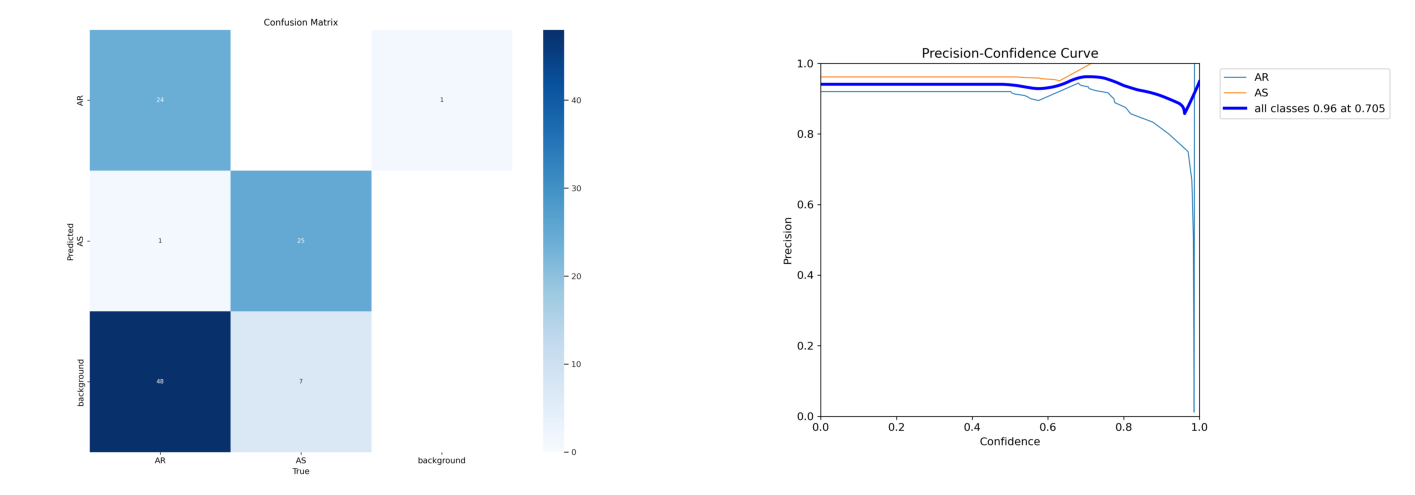

In [3]:
# Validar el modelo entrenado

# Carga de modelo entrenado
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt') 

# Realizar validación
validation_results = model.val(data='/kaggle/working/Aisladores--3/data.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.5,
                               iou=0.6,
                               device='0')

# Cargar la imagen
image = mpimg.imread("/kaggle/working/runs/detect/val/confusion_matrix.png")
image_1 = mpimg.imread("/kaggle/working/runs/detect/val/P_curve.png")

# Mostrar la matriz de confusión imagen
fig, axis = plt.subplots(1,2,figsize=(18,8))
axis[0].imshow(image)
axis[0].axis('off')
axis[1].imshow(image_1)
axis[1].axis('off')
plt.show()

### **Rendimiento del modelo sobre datos de evaluación**

In [10]:
# Ruta de la carpeta con las imágenes
image_folder_path = '/kaggle/working/Aisladores--3/test/images'  # Cambia esto por la ruta a tu carpeta de imágenes

# Crear lista de rutas de archivos de imagen en la carpeta
image_paths = [os.path.join(image_folder_path, img) for img in os.listdir(image_folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
num_images = len(image_paths)

# Slider para seleccionar la imagen según el índice
slider = widgets.IntSlider(min=0, max=num_images-1, description='Imagen')

# Mostrar el slider y el botón por primera vez
display(slider)

IntSlider(value=0, description='Imagen', max=9)

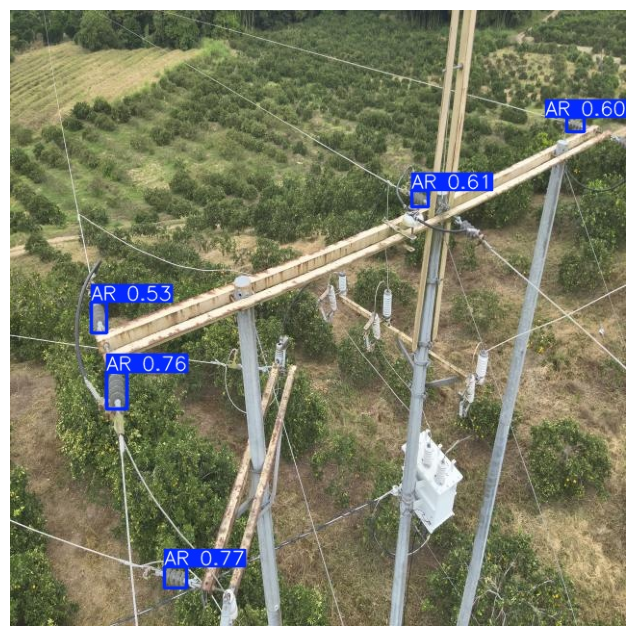

In [14]:
# Directorio de la imagen a
imagen_dir = image_paths[slider.value]

# Realizar una inferencia
model.predict(imagen_dir, save=True, imgsz=640, conf=0.3, show_boxes=True, show_labels=True)

# Ruta de la imagen con la inferencia del modelo
image_path = "/kaggle/working/runs/detect/predict/"+imagen_dir.rsplit('/', 1)[-1]

# Cargar la imagen
image = mpimg.imread(image_path)

# Mostrar la imagen
plt.figure(figsize=(10, 8)) 
plt.imshow(image)
plt.axis('off')
plt.show()